# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("data/lfw/*/*"))
dog_files = np.array(glob("data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


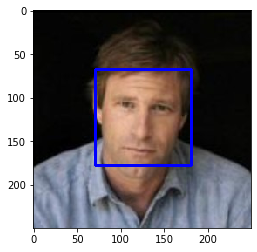

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x, y, w, h) in faces:
    
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__  
Percentage of human images where a face was detected 96.0%  
Percentage of dog images where a face was detected 18.0%

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm on the images in human_files_short and dog_files_short.

human_percentage = 0
dog_percentage = 0 

for file in human_files_short:
    if face_detector(file):
        human_percentage += 1

for file in dog_files_short:
    if face_detector(file):
        dog_percentage += 1

human_percentage /= len(human_files_short)
dog_percentage /= len(dog_files_short)

print('Percentage of human images where a face was detected {}%'.format(human_percentage*100))
print('Percentage of dog images where a face was detected {}%'.format(dog_percentage*100))

Percentage of human images where a face was detected 96.0%
Percentage of dog images where a face was detected 18.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print('CUDA available. Using GPU~')
else: 
    print('CUDA not available. Using CPU~')

CUDA available. Using GPU~


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms
import ast
import requests

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # [STEP 1: Load and Pre-process Image]
    image_tensor = load_transform_image(img_path)
    
    if use_cuda:
        image_tensor = image_tensor.cuda()
    else:
        image_tensor = image_tensor.cpu()
    
    # [STEP 2: Predict class for image]            
    output = VGG16(image_tensor)    
    
    _, pred_tensor = torch.max(output, 1)  
    predicted_class = np.squeeze(pred_tensor.cpu().numpy())
    
    return predicted_class 


def load_transform_image(img_path):
    image = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                         [0.229, 0.224, 0.225])])
    image = transform(image).unsqueeze(0)
    return image


def image_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

def get_english_label_for_class_id(class_id):
    LABELS_MAP_URL = "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/c2c91c8e767d04621020c30ed31192724b863041/imagenet1000_clsid_to_human.txt"
    labels = ast.literal_eval(requests.get(LABELS_MAP_URL).text)
    return labels[class_id]

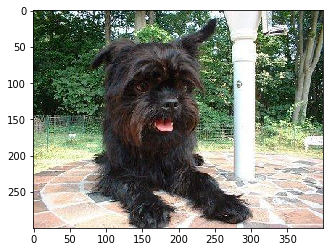

In [10]:
image = Image.open('data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')
plt.imshow(image)

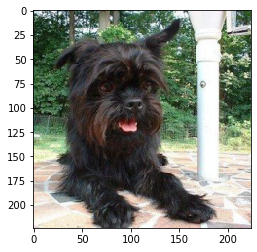

In [11]:
image = load_transform_image('data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg')
plt.imshow(image_convert(image))

In [12]:
prediction = int(VGG16_predict('data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'))
print('Predicted Class: {} ({})'.format(prediction, get_english_label_for_class_id(prediction)))

Predicted Class: 252 (affenpinscher, monkey pinscher, monkey dog)


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### TODO: returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = VGG16_predict(img_path)
    return prediction >= 151 and prediction <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
Percentage of human images where a dog was detected 0.0%  
Percentage of dog images where a dog was detected 93.0%

In [14]:
### TODO: Test the performance of the dog_detector function on the images in human_files_short and dog_files_short.
human_percentage = 0
dog_percentage = 0 

for file in human_files_short:
    if dog_detector(file):
        human_percentage += 1

for file in dog_files_short:
    if dog_detector(file):
        dog_percentage += 1

human_percentage /= len(human_files_short)
dog_percentage /= len(dog_files_short)

print('Percentage of human images where a dog was detected {}%'.format(human_percentage*100))
print('Percentage of dog images where a dog was detected {}%'.format(dog_percentage*100))

Percentage of human images where a dog was detected 0.0%
Percentage of dog images where a dog was detected 93.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
import os
from torchvision import datasets
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

data_dir = 'data/dog_images'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop((224, 224)),
                                                transforms.RandomHorizontalFlip(),
                                                transforms.RandomRotation(25),
                                                transforms.ToTensor(),
                                                transforms.Normalize((0.485, 0.456, 0.406),
                                                                     (0.229, 0.224, 0.225))]),
                   
                   'valid': transforms.Compose([transforms.Resize((224, 224)),
                                                transforms.CenterCrop(224),
                                                transforms.ToTensor(),
                                                transforms.Normalize((0.485, 0.456, 0.406),
                                                                     (0.229, 0.224, 0.225))]),
                   
                   'test': transforms.Compose([transforms.Resize((224, 224)),
                                               transforms.ToTensor(), 
                                               transforms.Normalize((0.485, 0.456, 0.406),
                                                                    (0.229, 0.224, 0.225))])}

train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:  
For the *training data*, I performed:
- Random resizing and cropping to 224x224
- Data Augmentation via random horizontal flips and random rotations by 25 degrees
- Turned them all into tensors for GPU processing
- Normalized to a mean of 0.485, 0.456, and 0.406, and a standard deviation of 0.229, 0.224, and 0.225, to keep everything consistent

For the *validation data*, I performed:
- Resizing to 224x224 
- Center crop to 224x224
- Turned them all into tensors for GPU processing
- Normalized to a mean of 0.485, 0.456, and 0.406, and a standard deviation of 0.229, 0.224, and 0.225, to keep everything consistent  

I don't want to augment this data because it's used to validate the model - to get an easly look at it's performance. 

For the *test data*, I performed: 
- Resizing to 224x224 to keep consistency 
- Turned them all into tensors for GPU processing
- Normalized to a mean of 0.485, 0.456, and 0.406, and a standard deviation of 0.229, 0.224, and 0.225, to keep everything consistent

For all input tensors, I chose a size of 224x224 because the majority of pre-trained models require this size as input. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [17]:
import torch.nn as nn
import torch.nn.functional as F

num_classes = 133

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) 
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) 
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(28 * 28 * 64, 500)
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, num_classes)
        
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        
        # Hidden Layer 1
        x = F.relu(self.conv1(x)) # 224x224x3 --> 224x224x16
        x = self.pool(x) # 224x224x16 --> 112x112x16
        
        # Hidden Layer 2
        x = F.relu(self.conv2(x)) # 112x112x16 --> 112x112x32
        x = self.pool(x) # 112x112x32 --> 56x56x32
        
        # Hidden Layer 3
        x = F.relu(self.conv3(x)) # 56x56x32 --> 56x56x64
        x = self.pool(x) # 56x56x64 --> 28x28x64
        
        # Flatten
        x = x.view(-1, 28 * 28 * 64) # 28x28x64 --> 1x50,176
        
        # Hidden Layer 4
        x = self.dropout(x)
        
        # Hidden Layer 5
        x = F.relu(self.fc1(x)) # 1x50,176 --> 1x500
        x = self.dropout(x)
        
        # Hidden Layer 6
        x = F.relu(self.fc2(x)) # 1x500 --> 1x300
        x = self.dropout(x)
        
        # Output layer 
        x = self.fc3(x) # 1x300 --> 1x133
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    print('CUDA available! Using GPU~')
else:
    print('CUDA unavailable. Using CPU~')

CUDA available! Using GPU~


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
Our images have dimensions 224x224x3 and we have 133 classes to make a prediction across. 

First, I wanted to extract patterns in the image, which is what the first 3 hidden layers aim to achieve.  
They follow the pattern: Convolutional Layer, Relu Acvtivation, Max Pooling Layer.  
- The convolutional layers help find patterns in the images while increasing the number of filters.  
- The relu activations ensure no values are negative.  
- The max pooling layers help prevent overfitting while decreasing the x-y dimensions. 

&emsp; Hidden Layer 1:  
&emsp; Convolutional Layer 1 + Relu increases dimensions from 224x224x3 to 224x224x16 by increasing the number of filters  
&emsp; Max Pooling Layer decreases the x-y dimensions from 224x224x16 to 112x112x16  
        
&emsp; Hidden Layer 2:  
&emsp; Convolutional Layer 2 + Relu increases dimensions from 112x112x16 to 112x112x32 by increasing the number of filters  
&emsp; Max Pooling Layer decreases the x-y dimensions from 112x112x32 to 56x56x32  
        
&emsp; Hidden Layer 3:  
&emsp; Convolutional Layer 3 + Relu increases dimensions from 56x56x32 to 56x56x64 by increasing the number of filters  
&emsp; Max Pooling Layer decreases the x-y dimensions from 56x56x64 to 28x28x64  

Next, I flatten the resulting image data into a 28 * 28 * 64 = 50,176 vector.  

I then used the following 3 Fully-Connected Layers to produce scores for the 133 classes.  
I used Dropout to reduce overfitting, once again.  

&emsp; Hidden Layer 4:  
&emsp; Dropout with 25%  

&emsp; Hidden Layer 5:  
&emsp; Reduce 1x50,176 to 1x500  
&emsp; Dropout with 25% 

&emsp; Hidden Layer 6:  
&emsp; Reduce 1x500 to 1x300  
&emsp; Dropout with 25%

&emsp; Output Layer:  
&emsp; Reduce 1x300 to 1x133 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [18]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    # If there's already a saved model, load it
    if os.path.exists(save_path):
        model.load_state_dict(torch.load(save_path))
    
    for epoch in range(1, n_epochs+1):
        
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0) # Accumulate all loss
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0) # Accumulate all loss
            
        # Calculate average losses - Divide accumulated loss by the number of data points
        train_loss /= len(loaders['train'].dataset) 
        valid_loss /= len(loaders['valid'].dataset)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.4f} \tValidation Loss: {:.4f}'.format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('\nValidation loss has dcreased from {:.4f} to {:.4f}! Saving model~\n'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [20]:
# train the model
model_scratch = train(5, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.5447 	Validation Loss: 3.7200

Validation loss has dcreased from inf to 3.7200! Saving model~

Epoch: 2 	Training Loss: 3.5509 	Validation Loss: 3.7007

Validation loss has dcreased from 3.7200 to 3.7007! Saving model~

Epoch: 3 	Training Loss: 3.5402 	Validation Loss: 3.7766
Epoch: 4 	Training Loss: 3.5413 	Validation Loss: 3.6572

Validation loss has dcreased from 3.7007 to 3.6572! Saving model~

Epoch: 5 	Training Loss: 3.5238 	Validation Loss: 3.6478

Validation loss has dcreased from 3.6572 to 3.6478! Saving model~



<All keys matched successfully>

**Note:** Model was trained on ~100 epochs in total

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    test_loss = 0
    num_correct_pred = 0 
    total_num_pred = 0 

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # calculate the loss
        loss = criterion(output, target)
        
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        
        # compare predictions to true label
        num_correct_pred += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total_num_pred += data.size(0)
            
    print('Test Loss: {:.4f}\n'.format(test_loss))
    print('Test Accuracy: {:.4f}% ({} / {})'.format(100 * num_correct_pred / total_num_pred, num_correct_pred, total_num_pred)) 

# call test function
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.7045

Test Accuracy: 13.3971% (112 / 836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [22]:
## TODO: Specify data loaders
batch_size_transfer = 10

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_transfer, shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size_transfer, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_transfer, shuffle=True, num_workers=num_workers)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

# Freeze feature parameters 
for param in model_transfer.parameters():
    param.required_grad = False
    
# Replace final fully-connected layer with linear layer of 133 output features
model_transfer.fc = nn.Linear(2048, num_classes)

if use_cuda:
    model_transfer = model_transfer.cuda()
    print('CUDA available! Using GPU~')
else:
    print('CUDA unavailable. Using CPU~')

CUDA available! Using GPU~


In [24]:
# Check to make sure final layer outputs 133 values 
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  
With popular pre-trained networks having been in development for long periods of time on many GPUs, they're all very advanced and likely to perform better than many networks made from scratch.  
These models work well as feature detectors for images they weren't trained on, as long as we can tune the final layer(s) to suit our particular problem.  

In this particular case, I only replaced the final fully-connected layer with a Linear layer that outputs 133 classes to match the problem at hand. I'll also re-train this final layer, to make sure it's "up to speed" with the rest of the network. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
num_epochs = 5

# train the model
model_transfer = train(num_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.8272 	Validation Loss: 1.2184

Validation loss has dcreased from inf to 1.2184! Saving model~

Epoch: 2 	Training Loss: 1.7611 	Validation Loss: 1.1520

Validation loss has dcreased from 1.2184 to 1.1520! Saving model~

Epoch: 3 	Training Loss: 1.6926 	Validation Loss: 1.2105
Epoch: 4 	Training Loss: 1.6738 	Validation Loss: 1.3120
Epoch: 5 	Training Loss: 1.6821 	Validation Loss: 1.1601


<All keys matched successfully>

**Note:** Model was trained on ~70 epochs in total

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.0223

Test Accuracy: 81.5789% (682 / 836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
### TODO: Write a function that takes a path to an image as input and returns the dog breed that is predicted by the model.

# Get train, validation, and test image datasets
image_datasets = {'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
                  'valid': datasets.ImageFolder(os.path.join(data_dir, 'valid'), data_transforms['valid']),
                  'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms['test'])}

# List of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

def predict_breed_transfer(img_path):
    
    # load the image and return the predicted breed
    image_tensor = load_transform_image(img_path)
    
    # Move image tensor to GPU
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    # Get scores
    output = model_transfer(image_tensor)
    
    # Get prediction
    _, pred_tensor = torch.max(output, 1)
    pred = np.squeeze(pred_tensor.cpu().numpy())
    
    # Return class name
    return class_names[pred]

In [29]:
# Helper function for displaying images and class names
def display_image(img_path, title=None):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

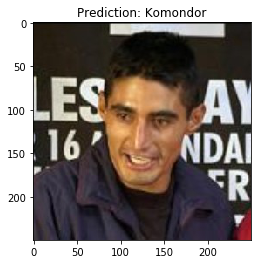

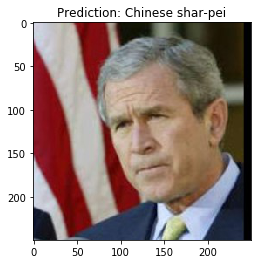

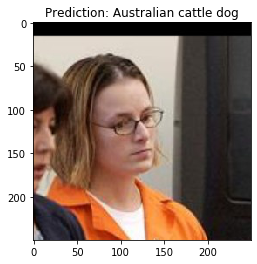

In [30]:
import random

# Test 3 random human images
for image in random.sample(list(human_files), 3):
    
    # Run image through model 
    pred_breed = predict_breed_transfer(image) 
    
    # Display image and class name
    display_image(image, 'Prediction: ' + pred_breed)

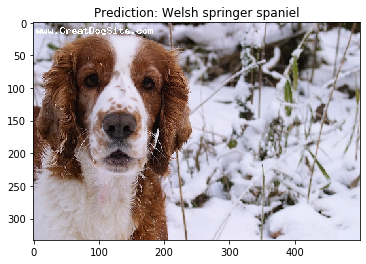

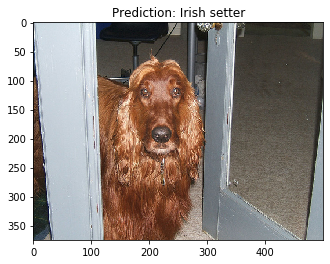

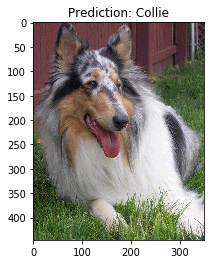

In [31]:
# Test 3 random dog images
for image in random.sample(list(dog_files), 3):
    
    # Run image through model 
    pred_breed = predict_breed_transfer(image) 
    
    # Display image and class name
    display_image(image, 'Prediction: ' + pred_breed)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [47]:
### TODO: Write your algorithm.

def run_app(img_path):
    
    ## handle cases for a human face, dog, and neither
    
    # If a dog is detected in the image 
    if dog_detector(img_path):
        print('Hello dog~')
        
    # If a human is detected in the image 
    elif face_detector(img_path):
        print('Hello human~')
    
    # If neither a dog nor a human is detected in the image 
    else: 
        print('You\'re neither a dog nor a human!!')
        return
    
    pred_breed = predict_breed_transfer(img_path)
    print('You look like a {}!'.format(pred_breed))
    display_image(img_path, pred_breed)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__  
I tested 6 images: 2 dog images from the given dataset, 2 human images from the given dataset, and 2 of my own images.  
The result was as expected for the 2 dog images, 2 human images, and the image of myself.  
The algorithm predicted the anime dragon incorrectly. It isn't a dog nor a human, although it classified it as a human.  

To improve this model, I could:  
- Try using a different pre-trained network for transfer learning 
- Try different optimizers and loss functions 
- Train the model on more epochs to decrease the loss and therefore increase accuracy

Hello dog~
You look like a Keeshond!


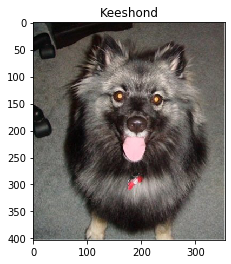



Hello dog~
You look like a Welsh springer spaniel!


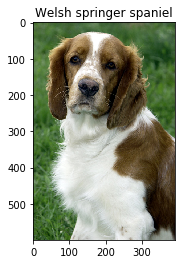

In [51]:
# Test two dog images
for file in random.sample(list(dog_files), 2):
    run_app(file)
    print('\n')

data/lfw\James_McPherson\James_McPherson_0001.jpg
Hello human~
You look like a English springer spaniel!


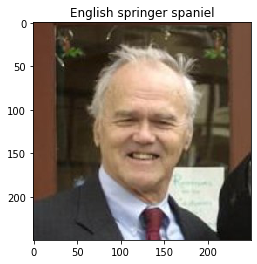



data/lfw\George_W_Bush\George_W_Bush_0322.jpg
Hello human~
You look like a Bull terrier!


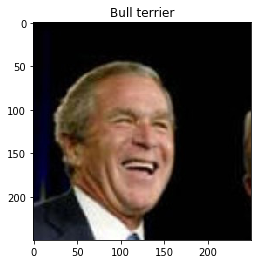

In [54]:
# Test two human images
for file in random.sample(list(human_files), 2):
    print(file)
    run_app(file)
    print('\n')

Hello human~
You look like a German pinscher!


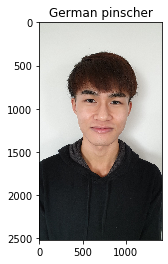

Hello human~
You look like a German pinscher!


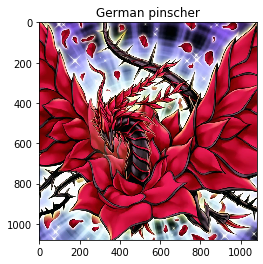

In [64]:
# Test personal images
run_app('data/personal_images/profile_picture.jpg')
run_app('data/personal_images/black_rose_dragon.jpg')
# run_app('data/personal_images/stardust_dragon.jpg')